# LINEAR REGRESSION


In [1]:
import pandas as pd
titanic_df = pd.read_csv("titanic-passengers.csv",sep=";")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [2]:
titanic_df["Survived"]=titanic_df["Survived"].map({"Yes": 1, "No": 0}) #convert admitted variable into numerical
titanic_df["Sex"]=titanic_df["Sex"].map({"male": 1, "female": 0})


In [3]:
titanic_df.corr()['Survived'].sort_values()

Sex           -0.543351
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

In [4]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x = titanic_df[['Pclass','Sex']]
y = titanic_df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.83


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

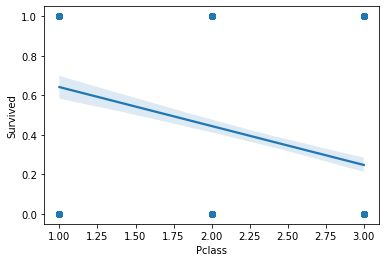

In [8]:
import seaborn as sns
sns.regplot(x='Pclass',y='Survived',data=titanic_df)

# CONFUSION MATRIX

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       144
           1       0.79      0.70      0.74        79

    accuracy                           0.83       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.82      0.83      0.82       223



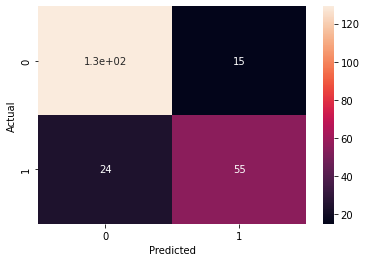

In [10]:
import seaborn as sns
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

# ROC/AUC

In [11]:
from sklearn.metrics import roc_curve
#predict probabilities
pred_prob1 = logreg.predict_proba(x_test)
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


In [13]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])

print(auc_score1)

0.8232243319268635


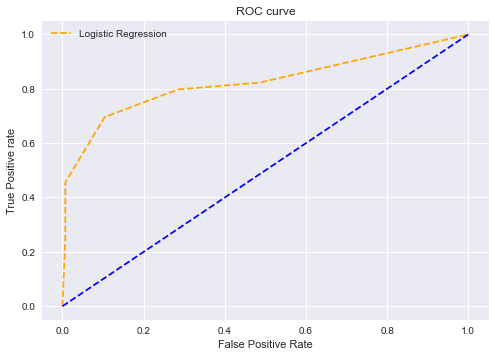

In [14]:
#plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();


# explanation

the ROC curve measures the performance of a binary model (logistic model in this exemple) at diffrenet threshold probabilites.

the AUC (area under the curve) measure the performance of the model at predecting a random positive value compared to the negative values: in the case the model has a higer accuracy at predecting positive values than the negative ones